# Pair Porgramming Asunciones Regresión Lineal

In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 

In [6]:
df = pd.read_csv('data/nofumadores.csv')

Las asunciones cuando queramos trabajar con un ANOVA:

Sin embargo, no nos podemos poner a hacer nuestras operaciones a lo loco. Antes de hacer nada, tenemos que comprobar una serie de asunciones. ¿Cuáles son?

- Los datos deben ser normales -> test de normalidad
- Las variables deben ser independientes -> correlación
- Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad


## 2. Las variables deben ser independientes  

In [8]:
numericas = df.select_dtypes(include = np.number)

<AxesSubplot:>

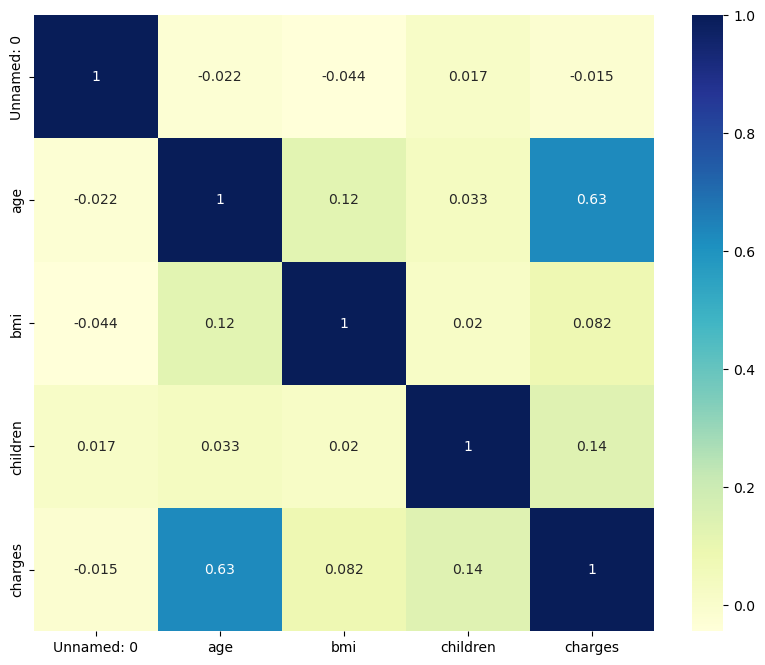

In [9]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

In [10]:
categoricas = df.select_dtypes(include = 'O')

In [11]:
categoricas

,sex,smoker,region
0,male,no,southeast
1,male,no,southeast
2,male,no,northwest
3,male,no,northwest
4,female,no,southeast
...,...,...,...
1056,female,no,southwest
1057,male,no,northwest
1058,female,no,northeast
1059,female,no,southeast


In [12]:
crosstab, test_results2, expected2 = rp.crosstab(df["sex"], df["region"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [13]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,0.2482
1,p-value =,0.9695
2,Cramer's V =,0.0153


Variables independientes, porque el valor de Chi es mayor que 0.5. No se puede rechazar la H0.

Cramer's V nos dice que, como el valor esta entre 0 - 0.1 sí son dependientes. ¿?

### 3. Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad